In [7]:
import tensorflow as tf
import os

In [8]:
base_dir = 'datasets/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [11]:
os.listdir('datasets/images/train')

['clean', 'messy']

In [12]:
os.listdir('datasets/images/val')

['clean', 'messy']

In [13]:
# membuat direktori ruangan rapi pada direktori data training
#train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
#train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
#validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
#validation_messy_dir = os.path.join(validation_dir, 'messy')

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
                    rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, 
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [20]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25
25/25 - 10s - loss: 0.7645 - accuracy: 0.5100 - val_loss: 0.6879 - val_accuracy: 0.5000 - 10s/epoch - 381ms/step
Epoch 2/25
25/25 - 8s - loss: 0.6838 - accuracy: 0.5000 - val_loss: 0.6341 - val_accuracy: 0.5000 - 8s/epoch - 333ms/step
Epoch 3/25
25/25 - 8s - loss: 0.6812 - accuracy: 0.5600 - val_loss: 0.6126 - val_accuracy: 0.5500 - 8s/epoch - 325ms/step
Epoch 4/25
25/25 - 8s - loss: 0.6429 - accuracy: 0.6400 - val_loss: 0.6879 - val_accuracy: 0.5500 - 8s/epoch - 333ms/step
Epoch 5/25
25/25 - 8s - loss: 0.6952 - accuracy: 0.4900 - val_loss: 0.6928 - val_accuracy: 0.5000 - 8s/epoch - 320ms/step
Epoch 6/25
25/25 - 8s - loss: 0.6929 - accuracy: 0.5000 - val_loss: 0.6906 - val_accuracy: 0.5000 - 8s/epoch - 317ms/step
Epoch 7/25
25/25 - 8s - loss: 0.6897 - accuracy: 0.5300 - val_loss: 0.6633 - val_accuracy: 0.7000 - 8s/epoch - 306ms/step
Epoch 8/25
25/25 - 8s - loss: 0.6544 - accuracy: 0.6500 - val_loss: 0.7399 - val_accuracy: 0.5000 - 8s/epoch - 316ms/step
Epoch 9/25
25/25 - 9s 

clean : classes([[0.00635317]])


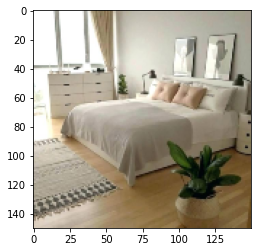

In [87]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# predicting images
path = 'datasets/images/test/1.png'
img = image.load_img(path, target_size=(150,150))

plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)  
if classes>=0.05:
  print(f'messy : classes({classes})')
else:
  print(f'clean : classes({classes})')

array([[0.00654352]], dtype=float32)

In [ ]:
print(train_generator.class_indices) 

{'clean': 0, 'messy': 1}
